TP: linear regression


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

In [12]:
#1. Import the data from text file
data = pd.read_csv('invest.txt', sep=" ", header=0)
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


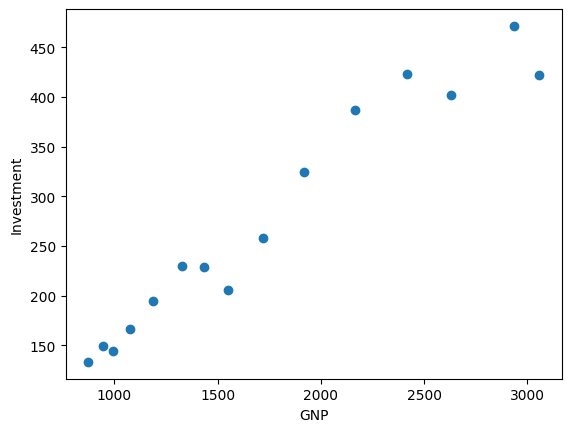

In [13]:
gnp = data['gnp']
invest = data['invest']

#2. Plot the data
plt.scatter(gnp, invest)
plt.xlabel('GNP')
plt.ylabel('Investment')
plt.show()

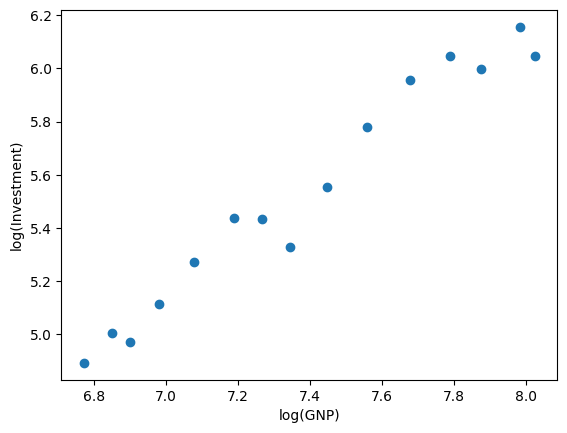

In [14]:
gnp_log = np.log(gnp)
invest_log = np.log(invest)


plt.scatter(gnp_log, invest_log)
plt.xlabel('log(GNP)')
plt.ylabel('log(Investment)')
plt.show()

In [30]:
#3 Ordinary Least Squares intercept and slope

b1 = np.sum((gnp_log - np.mean(gnp_log))*(invest_log- np.mean(invest_log)))/(np.sum((gnp_log - np.mean(gnp_log))**2))

b0 = np.mean(invest_log) - b1*np.mean(gnp_log)

n  = len(invest_log)
sigma2 = (1/(n-2))*np.sum((invest_log - (b0 + b1*gnp_log))**2)

Var_b0 = sigma2*((1/n) + np.mean(gnp_log)**2/np.sum((gnp_log - np.mean(gnp_log))**2))

Var_b1 = sigma2/np.sum((gnp_log - np.mean(gnp_log))**2)

R2 = np.sum((b0 + b1*gnp_log - np.mean(invest_log))**2)/np.sum((invest_log - np.mean(invest_log))**2)

# put the results in a dataframe

print("slope: ", b1)
print("intercept: ", b0)    
print("variance of b0: ", Var_b0)
print("variance of b1: ", Var_b1)
print("R2: ", R2)

slope:  1.015281401598871
intercept:  -1.9635913352301815
variance of b0:  0.1677289677260404
variance of b1:  0.003067283374269269
R2:  0.9627572956057854


In [47]:
#4 student t-test and p-value of slope

alpha = 0.05

t_test = b1/np.sqrt(Var_b1)

#calculating quantile of level alpha with ppf
t_quantile = np.abs(np.random.standard_t(n-2, size=1000000))
t_quantile = np.sort(t_quantile)
t_quantile_alpha = t_quantile[int((1-alpha)*1000000)]
print(t_quantile_alpha)

H0 = np.abs(t_test) < t_quantile_alpha
print("L'hypothèse H0 est:", H0, "pour un niveau de test alpha =", alpha)

p_value = 2*(1 - t.cdf(np.abs(t_test), n-2))
print("p-value:", p_value)


2.1608199790127576
L'hypothèse H0 est: False pour un niveau de test alpha = 0.05
p-value: 1.1363709973011282e-10


In [74]:
#5. For the GNP value 1000, estimate the necessary Investment, provide confidence and prediction intervals for the 90% level

gnp_v = 1000
invest_v = np.exp(b0 + b1*np.log(gnp_v))

print("Investment for GNP = 1000: ", invest_v)

#confidence interval
alpha = 0.1
t_quantile = np.abs(np.random.standard_t(n-2, size=1000000))
t_quantile = np.sort(t_quantile)
t_quantile_alpha = t_quantile[int((1-alpha)*1000000)]

term = (np.log(gnp_v) - np.mean(gnp_log) )**2/ (np.sum((gnp_log - np.mean(gnp_log))**2))

CI = [b0 + b1*np.log(gnp_v) - t_quantile_alpha*np.sqrt(sigma2)*np.sqrt(1/n + term), b0 + b1*np.log(gnp_v) + t_quantile_alpha*np.sqrt(sigma2)*np.sqrt(1/n + term)]
print("Confidence interval: ",np.exp(CI))

#prediction interval

PI = [b0 + b1*np.log(gnp_v) - t_quantile_alpha*np.sqrt(sigma2)*np.sqrt(1+1/n + term),b0 + b1*np.log(gnp_v) + t_quantile_alpha*np.sqrt(sigma2)*np.sqrt(1+1/n + term)]
print("Prediction interval: ", np.exp(PI))


def intervals(gnp_v,alpha):
    t_quantile = np.abs(np.random.standard_t(n-2, size=1000000))
    t_quantile = np.sort(t_quantile)
    t_quantile_alpha = t_quantile[int((1-alpha)*1000000)]
    term = (gnp_v - np.mean(gnp_log) )**2/ (np.sum((gnp_log - np.mean(gnp_log))**2))
    ci_inf = b0 + b1*(gnp_v) - t_quantile_alpha*np.sqrt(sigma2)*np.sqrt(1/n + term)
    ci_sup =b0 + b1*(gnp_v) + t_quantile_alpha*np.sqrt(sigma2)*np.sqrt(1/n + term)
    pi_inf = b0 + b1*(gnp_v) - t_quantile_alpha*np.sqrt(sigma2)*np.sqrt(1+1/n + term)
    pi_sup =b0 + b1*(gnp_v) + t_quantile_alpha*np.sqrt(sigma2)*np.sqrt(1+1/n + term)
    CI = [ci_inf, ci_sup]
    PI = [pi_inf, pi_sup]
    return CI,PI

Investment for GNP = 1000:  155.97942793105494
Confidence interval:  [146.69281161 165.85394792]
Prediction interval:  [132.04460923 184.2527467 ]


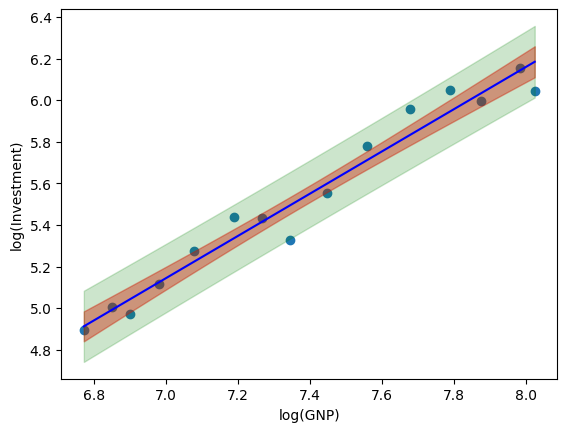

In [81]:
#6. plot the data and the regression line, logarithmic axes
# lot the data, the estimated regression line, the confidence and prediction intervals for all values of log(GNP) between its minimum and maximum in the data set.
plt.scatter(gnp_log, invest_log)
plt.xlabel('log(GNP)')
plt.ylabel('log(Investment)')
plt.plot(gnp_log, b0 + b1*gnp_log, color='blue')

x = np.linspace(gnp_log.min(), gnp_log.max(), 1000)
ci_inf = intervals(x,0.1)[0][0]
ci_sup = intervals(x,0.1)[0][1]
pi_inf = intervals(x,0.1)[1][0]
pi_sup = intervals(x,0.1)[1][1]

#prediction interval
plt.fill_between(x,ci_inf, ci_sup, color='red', alpha=.4)
plt.fill_between(x,pi_inf, pi_sup, color='green', alpha =.2)

plt.show()

In [ ]:
#7
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

gnp_v = 1000

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
